# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style

### Importing data

In [26]:
# reading the CSV file into pandas dataframe

df = pd.read_csv("AirBNB.csv")

### EDA

In [27]:
# Check top few records to get a feel of the data structure

df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [28]:
# drop the id column as it is useless for the model

df = df.drop('id', axis = 1)

In [29]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [30]:
df.tail()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000
74110,Entire home/apt,4.0,1.0,moderate,False,f,96.0,1.0,2.0,4.852030


In [31]:
df['log_price'] = round(df['log_price'], 2)

In [32]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.01
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.13
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.98
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.62
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.74


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [34]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782045
std,2.153603,0.582054,7.836556,0.852149,1.254142,0.717342
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,92.000000,1.000000,1.000000,4.320000
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.710000
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220000
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600000


### unique values for categorical variables

In [35]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts().sort_values())
        print("\n")

ROOM_TYPE :  3
room_type
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: count, dtype: int64


CANCELLATION_POLICY :  3
cancellation_policy
moderate    19060
flexible    22543
strict      32500
Name: count, dtype: int64


CLEANING_FEE :  2
cleaning_fee
False    19708
True     54399
Name: count, dtype: int64


INSTANT_BOOKABLE :  2
instant_bookable
t    19451
f    54660
Name: count, dtype: int64




### Converting Instant_bookable from 'f' and 't' to boolean

In [36]:
df.instant_bookable.replace(['f', 't'], [False, True], inplace = True)

### Converting categorical to dummy variables

In [37]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,False,100.0,1.0,1.0,5.01
1,Entire home/apt,7.0,1.0,strict,True,True,93.0,3.0,3.0,5.13
2,Entire home/apt,5.0,1.0,moderate,True,True,92.0,1.0,3.0,4.98
3,Entire home/apt,4.0,1.0,flexible,True,False,NaN,2.0,2.0,6.62
4,Entire home/apt,2.0,1.0,moderate,True,True,40.0,0.0,1.0,4.74


In [38]:
df = pd.get_dummies(df, columns = ['room_type', 'cancellation_policy', 'cleaning_fee'], drop_first = True)

In [39]:
# Are there any missing values ?

df.isnull().sum()

accommodates                        3
bathrooms                         203
instant_bookable                    0
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
dtype: int64

### Imputing missing values

In [40]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)

In [41]:
df.isnull().sum()

accommodates                    0
bathrooms                       0
instant_bookable                0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  74111 non-null  float64
 1   bathrooms                     74111 non-null  float64
 2   instant_bookable              74111 non-null  bool   
 3   review_scores_rating          74111 non-null  float64
 4   bedrooms                      74111 non-null  float64
 5   beds                          74111 non-null  float64
 6   log_price                     74111 non-null  float64
 7   room_type_Private room        74111 non-null  bool   
 8   room_type_Shared room         74111 non-null  bool   
 9   cancellation_policy_moderate  74111 non-null  bool   
 10  cancellation_policy_strict    74111 non-null  bool   
 11  cleaning_fee_True             74111 non-null  bool   
dtypes: bool(6), float64(6)
memory usage: 3.8 MB


In [45]:
df.describe(include = ['bool'])

,instant_bookable,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
count,74111,74111,74111,74111,74111,74111
unique,2,2,2,2,2,2
top,False,False,False,False,False,True
freq,54660,43476,71948,55051,41611,54399


### Checking for duplicates

In [47]:
# Are there any duplicates ?
#df[dups]

df.duplicated().sum()

20482

In [49]:
df.drop_duplicates(inplace = True)

In [50]:
df.duplicated().sum()

0

### Correlation Plot

In [51]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,5.01,False,False,False,True,True
1,7.0,1.0,True,93.000000,3.0,3.0,5.13,False,False,False,True,True
2,5.0,1.0,True,92.000000,1.0,3.0,4.98,False,False,True,False,True
3,4.0,1.0,False,94.067365,2.0,2.0,6.62,False,False,False,False,True
4,2.0,1.0,True,40.000000,0.0,1.0,4.74,False,False,True,False,True


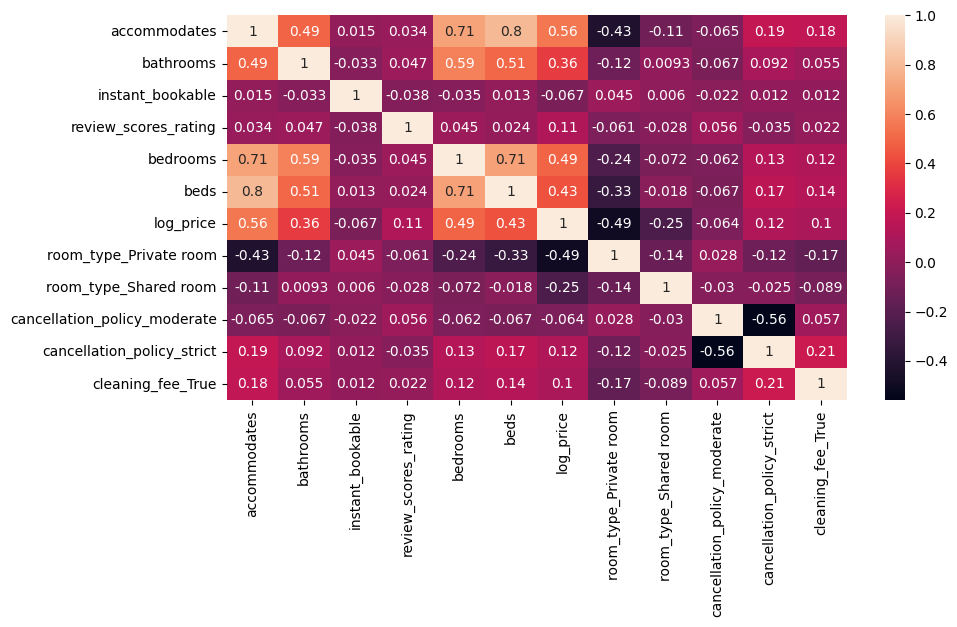

In [54]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True)
plt.show()

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


### Outlier Checks

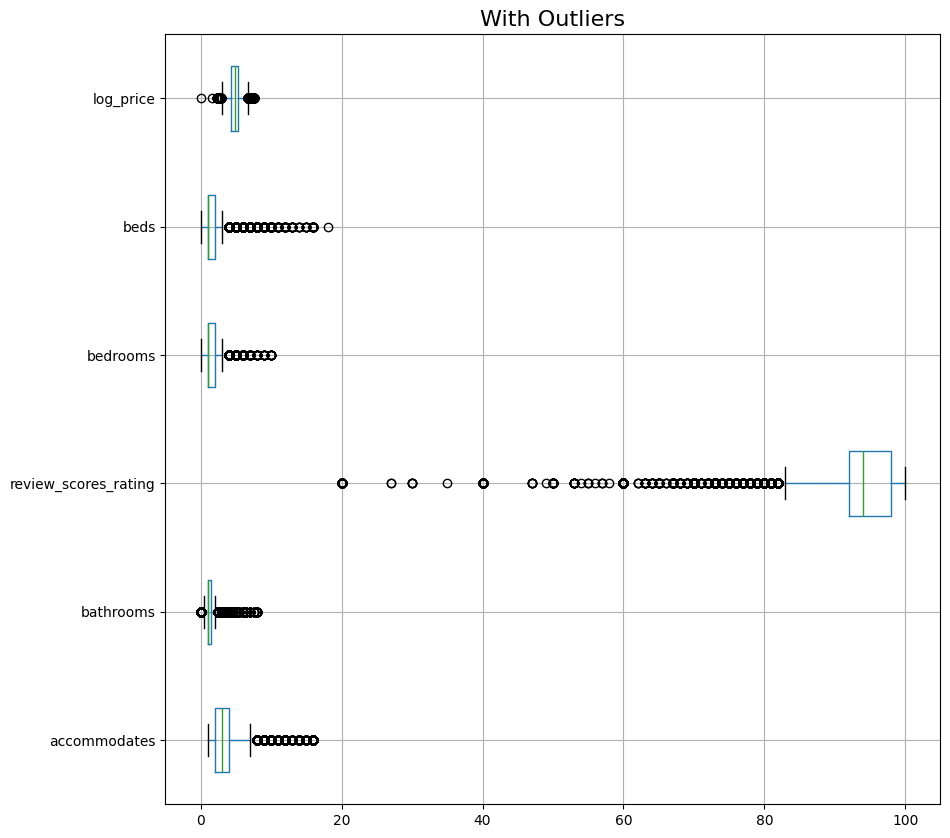

In [55]:
# construct box plot for continuous variables

cont = df.dtypes[(df.dtypes != 'bool')].index

plt.figure(figsize = (10, 10))
df[cont].boxplot(vert = 0)
plt.title('With Outliers', fontsize = 16)
plt.show()

In [57]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [58]:
for column in df[cont].columns:
    lr, ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

In [59]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,5.01,False,False,False,True,True
1,7.0,1.0,True,93.000000,3.0,3.0,5.13,False,False,False,True,True
2,5.0,1.0,True,92.000000,1.0,3.0,4.98,False,False,True,False,True
3,4.0,1.0,False,94.067365,2.0,2.0,6.62,False,False,False,False,True
4,2.0,1.0,True,83.000000,0.0,1.0,4.74,False,False,True,False,True


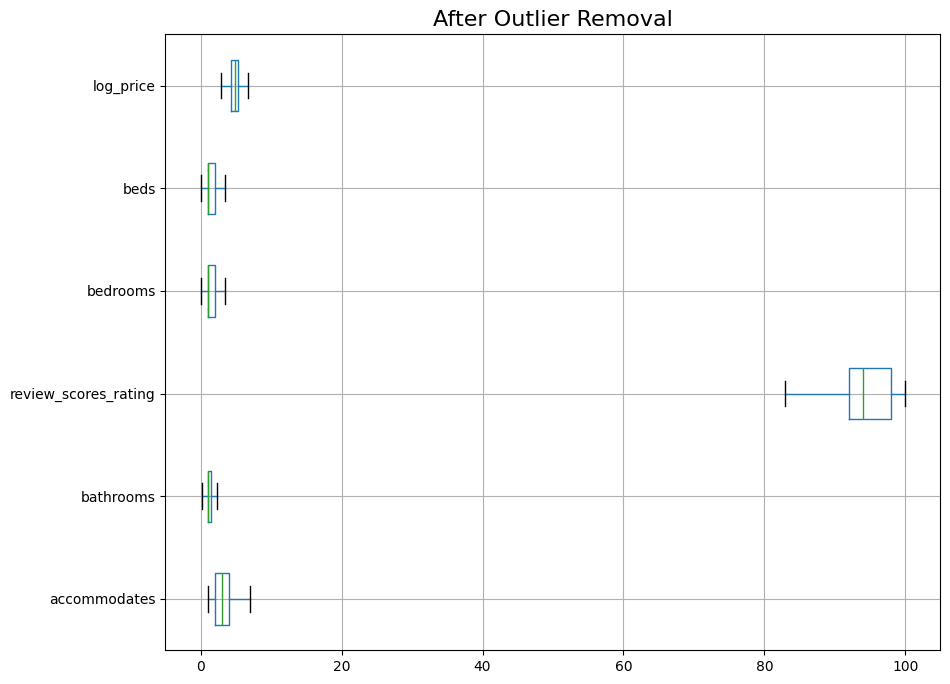

In [60]:
plt.figure(figsize = (10, 8))

df[cont].boxplot(vert = 0)
plt.title('After Outlier Removal', fontsize = 16)
plt.show()

### Data Distribution

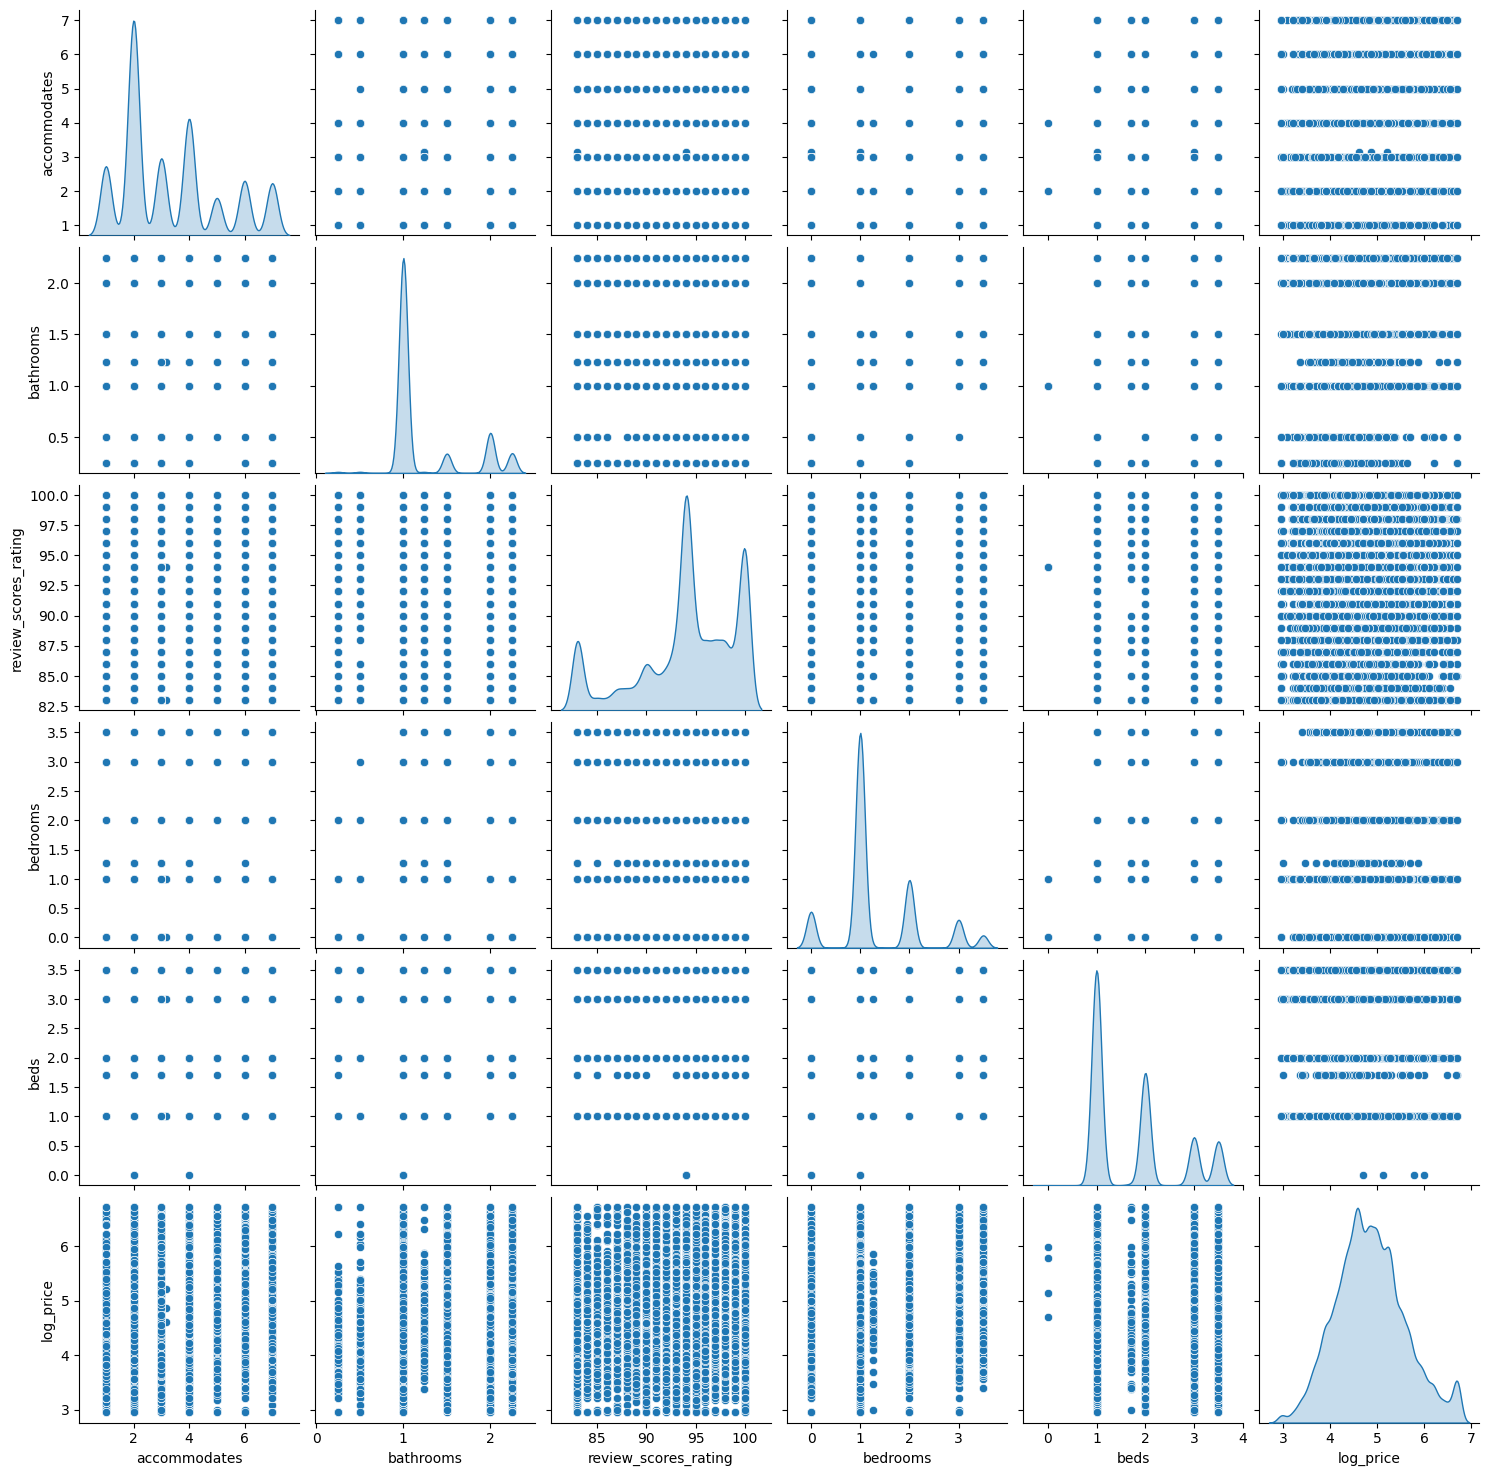

In [62]:
sns.pairplot(df[cont], diag_kind = 'kde')
plt.show()

### Train-Test Split

In [63]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis = 1)

# Copy target into the y dataframe. 
y = df[['log_price']]

In [64]:
X.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,False,False,False,True,True
1,7.0,1.0,True,93.000000,3.0,3.0,False,False,False,True,True
2,5.0,1.0,True,92.000000,1.0,3.0,False,False,True,False,True
3,4.0,1.0,False,94.067365,2.0,2.0,False,False,False,False,True
4,2.0,1.0,True,83.000000,0.0,1.0,False,False,True,False,True


In [65]:
# Split X and y into training and test set in 75:25 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

### Linear Regression Model

In [66]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Let us explore the coefficients for each of the independent attributes

for i, col_name in enumerate(X_train.columns):
    print("The Coefficient for {} is {}".format(col_name, regression_model.coef_[0][i]))

The Coefficient for accommodates is 0.09720708075752027
The Coefficient for bathrooms is 0.18550803461395274
The Coefficient for instant_bookable is -0.06843295628307076
The Coefficient for review_scores_rating is 0.011463738262216855
The Coefficient for bedrooms is 0.15431083201461107
The Coefficient for beds is -0.041714982823235845
The Coefficient for room_type_Private room is -0.6073319797219796
The Coefficient for room_type_Shared room is -1.0533992232047034
The Coefficient for cancellation_policy_moderate is -0.06970315482962539
The Coefficient for cancellation_policy_strict is -0.013461625963421427
The Coefficient for cleaning_fee_True is -0.07574251844946038


In [70]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.43409294056731


In [71]:
# R square on training data

regression_model.score(X_train, y_train)

0.5121322000797937

50% of the variation in the log_price is explained by the predictors in the model for train set

In [72]:
# R square on testing data

regression_model.score(X_test, y_test)

0.49298891021951086

In [73]:
#RMSE on Training data

predicted_train = regression_model.fit(X_train, y_train).predict(X_train)

np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

0.5149781737983964

In [74]:
#RMSE on Testing data

predicted_test = regression_model.fit(X_train, y_train).predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

0.5245756018378954

### Linear Regression using statsmodels

In [75]:
# concatenate X and y into a single dataframe

data_train = pd.concat([X_train, y_train], axis = 1)

data_test = pd.concat([X_test, y_test], axis = 1)



In [76]:
data_train.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,log_price
22837,2.0,1.0,False,95.0,1.0,1.0,True,False,True,False,False,4.52
36040,1.0,1.0,False,96.0,1.0,1.0,True,False,False,False,False,4.25
44305,1.0,1.0,False,91.0,1.0,1.0,False,True,True,False,True,3.71
2750,4.0,1.0,True,92.0,1.0,2.0,True,False,False,True,True,4.25
6440,2.0,1.0,False,96.0,1.0,1.0,False,False,False,True,True,4.50


In [78]:
data_train.columns

Index(['accommodates', 'bathrooms', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'log_price'],
      dtype='object')

In [92]:
data_train.rename(columns = {'room_type_Private room': 'room_type_Private_room', 'room_type_Shared room': 'room_type_Shared_room'}, inplace = True)

data_test.rename(columns = {'room_type_Private room': 'room_type_Private_room', 'room_type_Shared room': 'room_type_Shared_room'}, inplace = True)

In [93]:
data_train.columns

Index(['accommodates', 'bathrooms', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_Private_room', 'room_type_Shared_room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'log_price'],
      dtype='object')

In [94]:
expr = 'log_price ~ accommodates + bathrooms + instant_bookable + review_scores_rating + bedrooms + beds + room_type_Private_room + room_type_Shared_room + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True'

In [95]:
import statsmodels.formula.api as smf


In [96]:
lm1 = smf.ols(formula = expr, data = data_train).fit()
lm1.params

Intercept                               3.434093
instant_bookable[T.True]               -0.068433
room_type_Private_room[T.True]         -0.607332
room_type_Shared_room[T.True]          -1.053399
cancellation_policy_moderate[T.True]   -0.069703
cancellation_policy_strict[T.True]     -0.013462
cleaning_fee_True[T.True]              -0.075743
accommodates                            0.097207
bathrooms                               0.185508
review_scores_rating                    0.011464
bedrooms                                0.154311
beds                                   -0.041715
dtype: float64

In [97]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     3837.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:48:52   Log-Likelihood:                -30379.
No. Observations:               40221   AIC:                         6.078e+04
Df Residuals:                   40209   BIC:                         6.089e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [102]:
# Calculate MSE

mse_train = np.mean((lm1.predict(data_train.drop('log_price', axis = 1)) - data_train['log_price'])**2)

In [103]:
#Root Mean Squared Error - RMSE

np.sqrt(mse_train)

0.5149781737983965

In [104]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

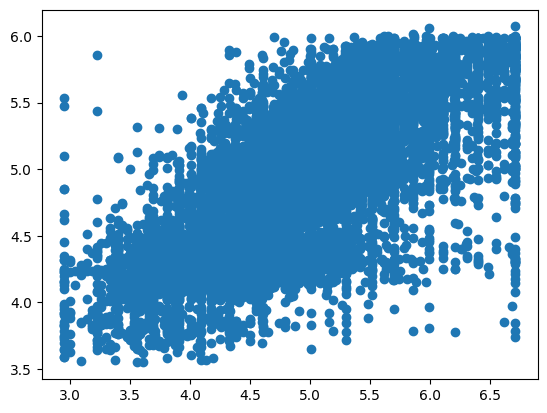

In [105]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [106]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (-0.61) * room_type_Private_room[T.True] + (-1.05) * room_type_Shared_room[T.True] + (-0.07) * cancellation_policy_moderate[T.True] + (-0.01) * cancellation_policy_strict[T.True] + (-0.08) * cleaning_fee_True[T.True] + (0.1) * accommodates + (0.19) * bathrooms + (0.01) * review_scores_rating + (0.15) * bedrooms + (-0.04) * beds + 

 # Conclusion

The final Linear Regression equation is  
  
<b>log_price = b0 + b1 * instant_bookable[T.True] + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True </b>
  
<b>log_price = (3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True</b>  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant.  
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant.

